In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

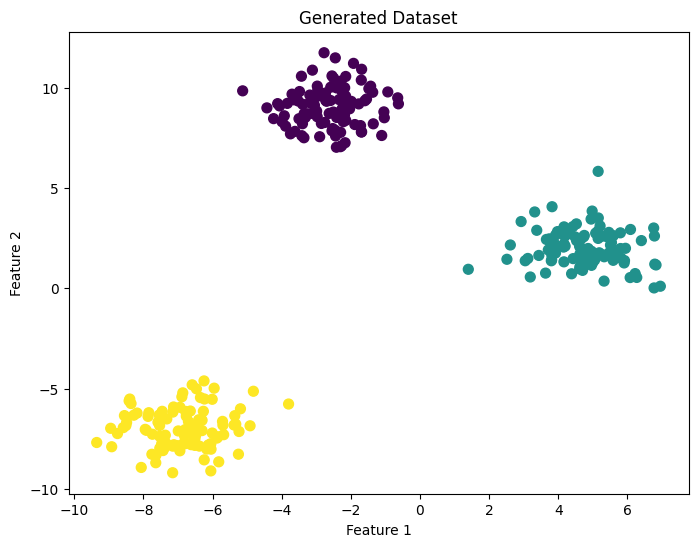

In [29]:
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.title("Generated Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [30]:
class K_means:
    def __init__(self, data, k=3):
        self.k = k
        self.data = data
        self.c = [0 for _ in range(len(data))] 
        
    def train(self):
        data = self.data
        curr_centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

        prev_centroids = None
        iteration = 0

        while prev_centroids is None or not np.all([np.allclose(prev, curr) for prev, curr in zip(prev_centroids, curr_centroids)]):
            prev_centroids = curr_centroids

            clusters = [[] for _ in range(self.k)]

            for i, element in enumerate(data):
                distances = [self.calculate_distance(centroid, element) for centroid in prev_centroids]
                cluster_idx = np.argmin(distances)
                clusters[cluster_idx].append(element)
                self.c[i] = cluster_idx

            curr_centroids = self.calculate_centroids(clusters)


    def calculate_distance(self, p1, p2):
        return np.linalg.norm(np.array(p1) - np.array(p2))

    def calculate_centroids(self, clusters):
        result = []
        for cluster in clusters:
            result.append(np.mean(cluster, axis=0))
            
        return result

    def plot_result(self):
        plt.figure(figsize=(8, 6))

        colors = plt.colormaps.get_cmap('tab10')

        for i in range(self.k):
            cluster_points = [self.data[j] for j in range(len(self.data)) if self.c[j] == i]
            cluster_points = np.array(cluster_points)
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i + 1}", color=colors(i), s=50)

        plt.title('K-means Clustering')
        plt.legend()
        plt.show()


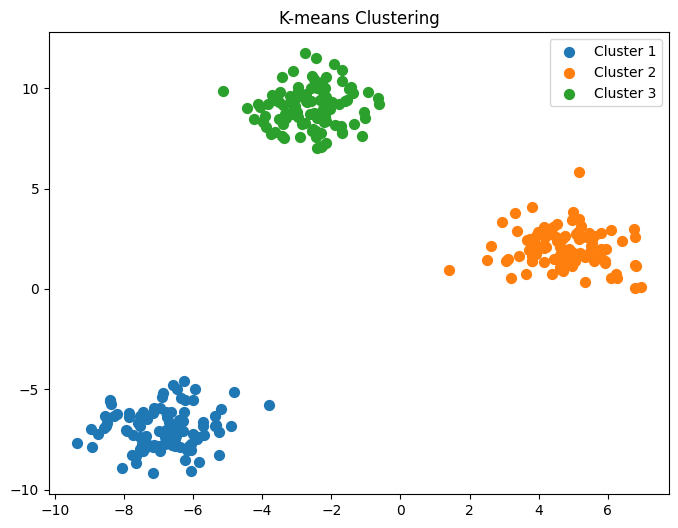

In [31]:
model = K_means(X)
model.train()
model.plot_result()
